<a href="https://colab.research.google.com/github/ShreyaskarSingh/ML/blob/main/My_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install surprise
import pandas as pd
from surprise import KNNBasic,Reader, Dataset, SVD
from surprise.model_selection import KFold, cross_validate
import numpy as np


**Task 3.a Data**

In [2]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
data = Dataset.load_from_file('./ratings_small.csv', reader=reader)

# **Task 3 c and d**

PROBABILISTIC MATRIX FACTORIZATION

In [9]:
svd = SVD(biased=False)
scores = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);
mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'MEAN OF MAE FOR PMF UNDER 5-FOLD IS : {mean_mae}')
print(f'MEAN OF RMSE FOR PMF UNDER 5-FOLD IS: {mean_rsme}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0055  1.0159  1.0132  1.0078  1.0128  1.0110  0.0038  
MAE (testset)     0.7751  0.7819  0.7807  0.7797  0.7833  0.7801  0.0028  
Fit time          4.73    4.70    4.69    4.63    4.65    4.68    0.04    
Test time         0.16    0.14    0.26    0.15    0.25    0.19    0.05    
MEAN OF MAE FOR PMF UNDER 5-FOLD IS : 0.7801436028684202
MEAN OF RMSE FOR PMF UNDER 5-FOLD IS: 1.0110355084456193


USER BASED COLLABORATIVE FILTERING

In [6]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);
mean_mae = cv_ub['test_mae'].mean()
mean_rsme = cv_ub['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rsme}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9674  0.9574  0.9702  0.9723  0.9662  0.9667  0.0051  
MAE (testset)     0.7448  0.7341  0.7450  0.7493  0.7418  0.7430  0.0050  
Fit time          0.12    0.15    0.15    0.15    0.16    0.15    0.01    
Test time         1.80    1.82    1.72    1.81    1.79    1.79    0.04    
Average MAE: 0.7429935477957853
Average RMSE: 0.9667101139955214


ITEM BASED COLLABORATIVE FILTERING

In [7]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);


mean_mae = cv_ib['test_mae'].mean()
mean_rsme = cv_ib['test_rmse'].mean()

print(f'Average MAE : {mean_mae}')
print(f'Average RMSE : {mean_rsme}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9343  0.9384  0.9370  0.9300  0.9352  0.9350  0.0029  
MAE (testset)     0.7208  0.7231  0.7229  0.7180  0.7225  0.7215  0.0019  
Fit time          4.24    4.20    3.70    3.65    3.74    3.91    0.26    
Test time         6.98    7.21    6.95    6.92    7.20    7.05    0.13    
Average MAE : 0.7214601255496771
Average RMSE : 0.9349637536188847


# **Task 3 E**

IMPACT OF METRICS ON ITEM AND USER BASED COLLAB. FILTERING

<Figure size 432x288 with 0 Axes>

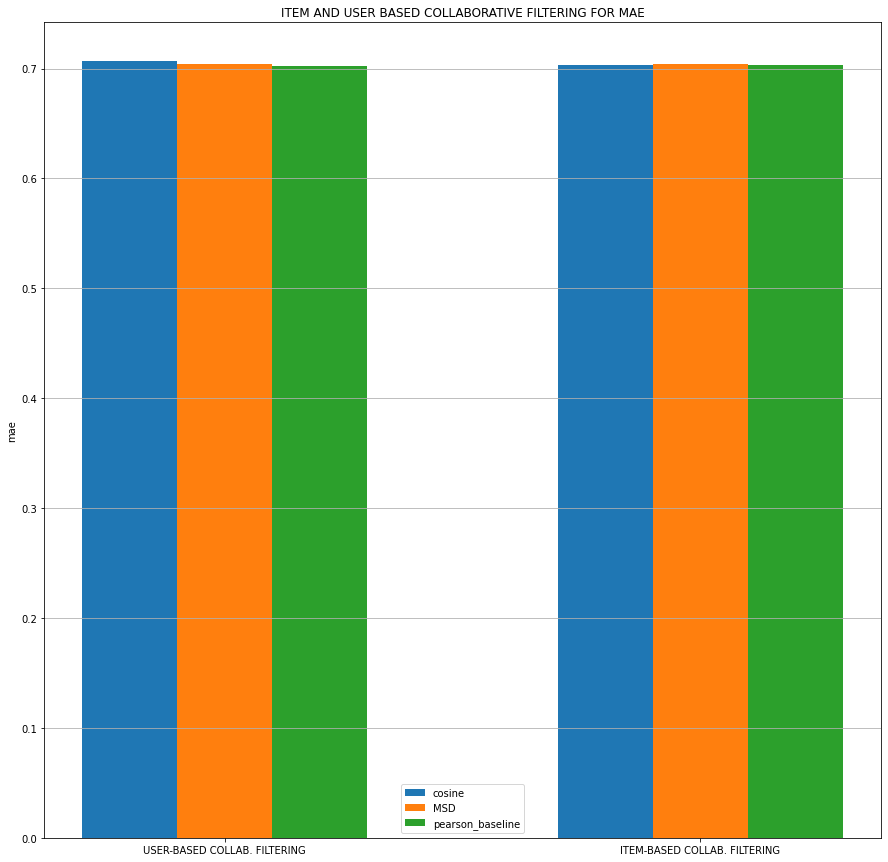

In [26]:
ifig=1
labels = ['USER-BASED COLLAB. FILTERING', 'ITEM-BASED COLLAB. FILTERING']
x = np.arange(0, len(labels) * 2.5, 2.5)
width = 0.5
plt.figure(ifig)
fig, ax = plt.subplots(figsize=(15,15))
for i in range(len(measures)):
    ax.bar(x - (width * len(measures)) / 2 + i * width, [ub_mae[i], ib_mae[i]], width, label=measures[i])
plt.xticks(x - width / 2, labels)
plt.title('ITEM AND USER BASED COLLABORATIVE FILTERING FOR MAE')
plt.ylabel('mae')
plt.grid(axis='y')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

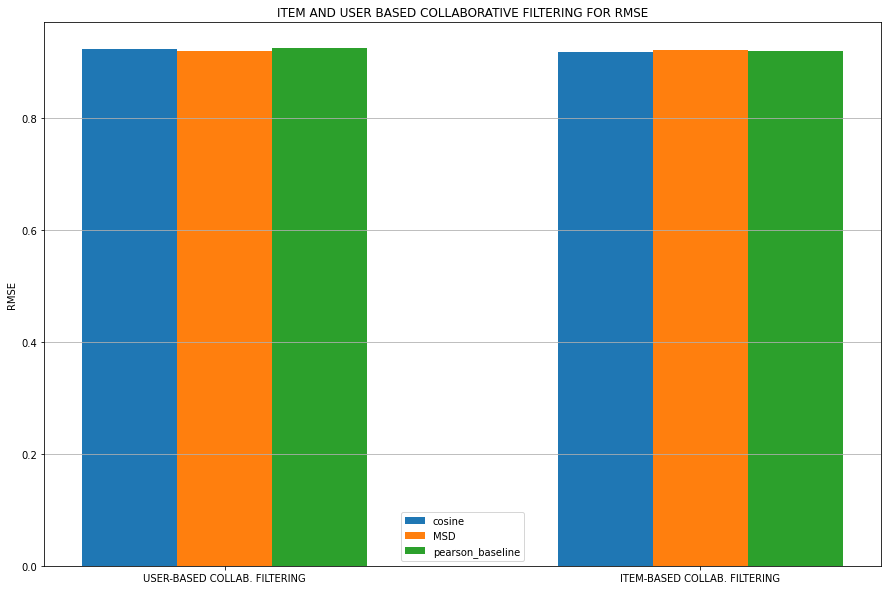

In [37]:
ifig=1
labels = ['USER-BASED COLLAB. FILTERING', 'ITEM-BASED COLLAB. FILTERING']
measures = ['cosine', 'MSD', 'pearson_baseline']
x = np.arange(0, len(labels) * 2.5, 2.5)
width = 0.5
plt.figure(ifig)
fig, ax = plt.subplots(figsize=(15,10))
for i in range(len(measures)):
    ax.bar(x - (width * len(measures)) / 2 + i * width, [ub_rmse[i], ib_rmse[i]], width, label=measures[i])
plt.xticks(x - width / 2, labels)
plt.title('ITEM AND USER BASED COLLABORATIVE FILTERING FOR RMSE')
plt.ylabel('RMSE')
plt.grid(axis='y')
plt.legend()
plt.show()

# Task 3 F and G

**For UCF**

In [29]:
min_k = 1
mean = 2000
ucf_k_results = []
measures = ['RMSE', 'MAE']

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': True}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k = i
  ucf_k_results.append(curr_mean)
  print(i)

print(min_k, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0581  1.0535  1.0596  1.0561  1.0631  1.0581  0.0032  
MAE (testset)     0.8486  0.8473  0.8524  0.8463  0.8544  0.8498  0.0031  
Fit time          0.11    0.14    0.15    0.15    0.15    0.14    0.01    
Test time         0.68    0.91    0.71    0.89    0.70    0.78    0.10    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

**For ICF**

In [32]:
min_k = 1
mean = 99999
icf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': False}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k = i
  icf_k_results.append(curr_mean)
  print(i)

print(min_k, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0598  1.0557  1.0583  1.0585  1.0579  1.0581  0.0013  
MAE (testset)     0.8516  0.8472  0.8503  0.8486  0.8513  0.8498  0.0017  
Fit time          3.68    3.93    3.81    3.76    3.77    3.79    0.08    
Test time         4.24    4.48    4.27    4.24    4.08    4.26    0.13    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

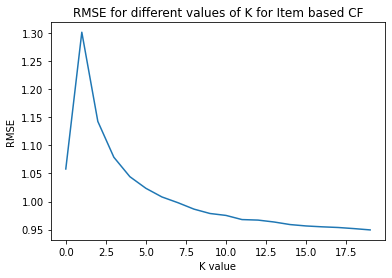

In [33]:
plt.plot(icf_k_results)
plt.xlabel("K value")
plt.ylabel("RMSE ")
plt.title("RMSE for different values of K for Item based CF")
plt.show()

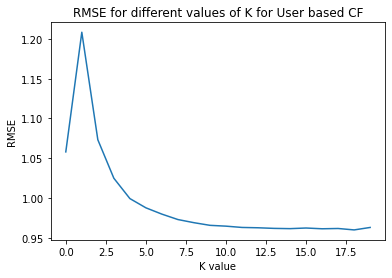

In [38]:
plt.plot(ucf_k_results)
plt.xlabel("K value")
plt.ylabel("RMSE")
plt.title("RMSE for different values of K for User based CF")
plt.show()

**Task 3 g.)**

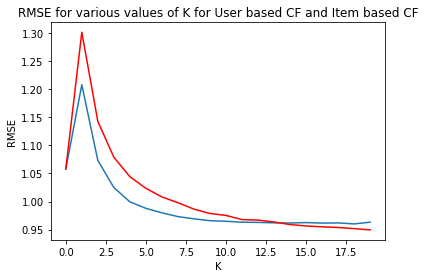

In [39]:
plt.plot(ucf_k_results)
plt.plot(icf_k_results, color='r')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF and Item based CF")
plt.show()